In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_data(file_path=r"C:\Users\alwyn\Downloads\archive (2)\netflix.csv"):
    df = pd.read_csv(file_path)
    df = df.dropna()
    df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
    df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    df = df.dropna()
    return df

In [4]:
def analyze_genres(df):
    df['genre'] = df['genre'].str.split(' / |, ')
    genres_exploded = df.explode('genre')
    genre_counts = genres_exploded['genre'].value_counts()
    genre_runtime = genres_exploded.groupby('genre')['runtime'].sum().sort_values(ascending=False)
    return genre_counts, genre_runtime, genres_exploded

In [5]:
def analyze_binge_behavior(df):
    short_form = df[df['runtime'] < 60]
    long_form = df[df['runtime'] > 100]
    binge_stats = {
        'short_form_count': len(short_form),
        'long_form_count': len(long_form),
        'short_form_avg_rating': short_form['imdb_score'].mean() if not short_form.empty else 0,
        'long_form_avg_rating': long_form['imdb_score'].mean() if not long_form.empty else 0
    }
    return binge_stats

In [6]:
def visualize_data(df, genre_counts, genre_runtime, genres_exploded):
    plt.style.use('seaborn-v0_8')
    
    plt.figure(figsize=(10, 6))
    genre_counts.head(10).plot(kind='bar', color='skyblue')
    plt.title('Top 10 Genres by Number of Titles')
    plt.xlabel('Genre')
    plt.ylabel('Number of Titles')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    genre_runtime.head(10).plot(kind='bar', color='lightcoral')
    plt.title('Top 10 Genres by Total Runtime (Minutes)')
    plt.xlabel('Genre')
    plt.ylabel('Total Runtime (Minutes)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    genres_exploded = genres_exploded.reset_index(drop=True)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='genre', y='imdb_score', data=genres_exploded, 
                order=genres_exploded['genre'].value_counts().index[:10])
    plt.title('IMDb Scores by Genre (Top 10 Genres)')
    plt.xlabel('Genre')
    plt.ylabel('IMDb Score')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 6))
    sns.histplot(df['runtime'], bins=30, color='mediumseagreen')
    plt.title('Distribution of Runtimes')
    plt.xlabel('Runtime (Minutes)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

Top 5 Genres by Frequency:
genre
Documentary        159
Drama               78
Comedy              52
Romantic comedy     39
Thriller            33
Name: count, dtype: int64

Top 5 Genres by Total Runtime:
genre
Documentary        12555
Drama               8280
Comedy              4818
Romantic comedy     3927
Thriller            3469
Name: runtime, dtype: int64

Binge Behavior Insights:
Short-form content (< 60 min): 69 titles, Avg IMDb: 6.54
Long-form content (> 100 min): 232 titles, Avg IMDb: 6.31


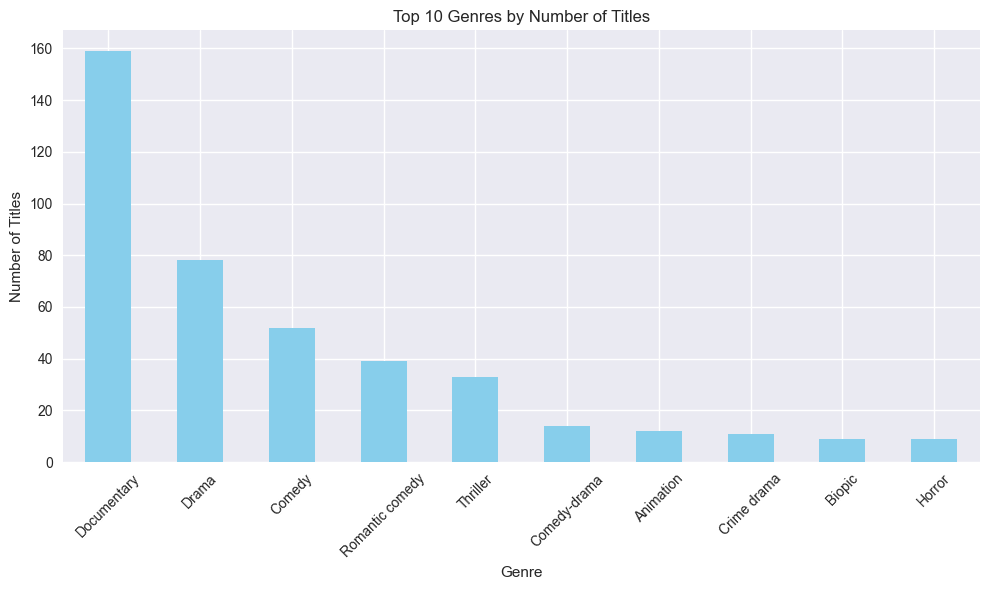

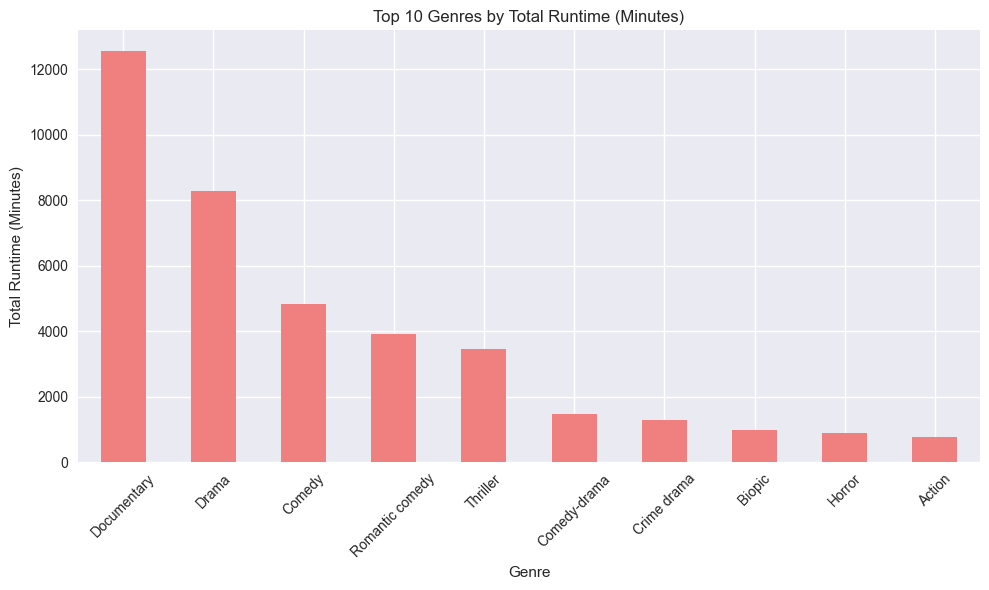

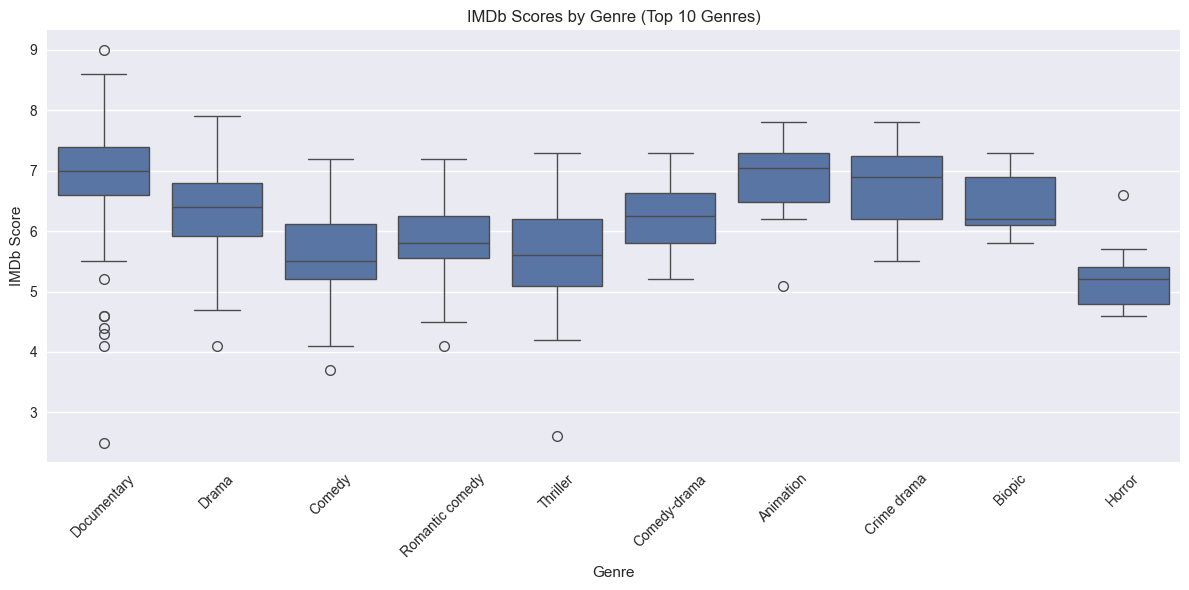

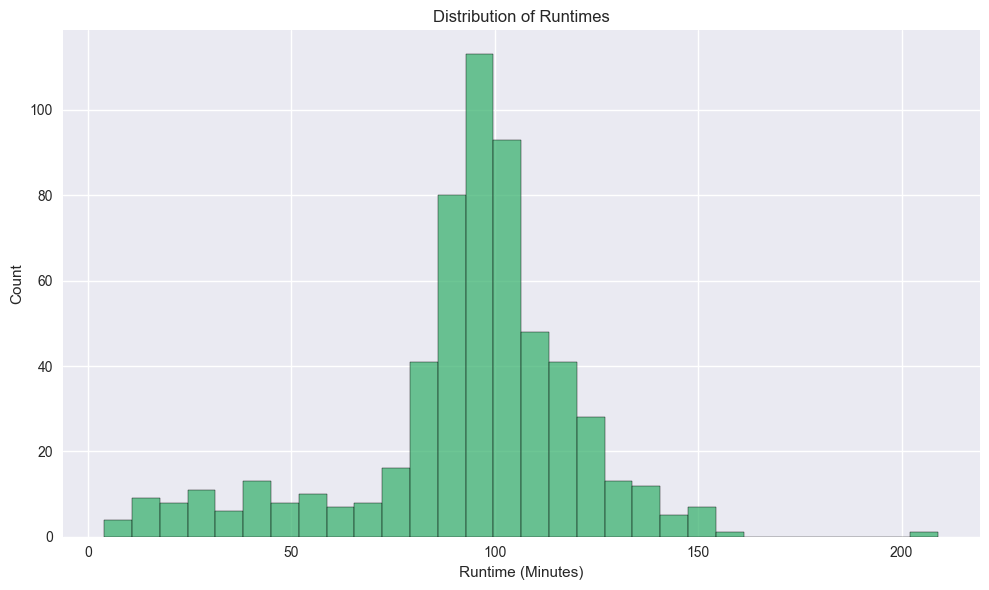


Content Recommendation Insights:
- Focus on Documentary and Drama, as they dominate both in frequency and total runtime.
- Short-form content (< 60 min) is popular and highly rated, suggesting demand for quick, engaging titles.
- Thriller and Comedy genres have lower average ratings, indicating potential for higher-quality content in these areas.


In [7]:
def main():
    df = load_data()
    
    genre_counts, genre_runtime, genres_exploded = analyze_genres(df)
    print("Top 5 Genres by Frequency:")
    print(genre_counts.head(5))
    print("\nTop 5 Genres by Total Runtime:")
    print(genre_runtime.head(5))
    
    binge_stats = analyze_binge_behavior(df)
    print("\nBinge Behavior Insights:")
    print(f"Short-form content (< 60 min): {binge_stats['short_form_count']} titles, Avg IMDb: {binge_stats['short_form_avg_rating']:.2f}")
    print(f"Long-form content (> 100 min): {binge_stats['long_form_count']} titles, Avg IMDb: {binge_stats['long_form_avg_rating']:.2f}")
    
    visualize_data(df, genre_counts, genre_runtime, genres_exploded)
    
    print("\nContent Recommendation Insights:")
    print("- Focus on Documentary and Drama, as they dominate both in frequency and total runtime.")
    print("- Short-form content (< 60 min) is popular and highly rated, suggesting demand for quick, engaging titles.")
    print("- Thriller and Comedy genres have lower average ratings, indicating potential for higher-quality content in these areas.")

if __name__ == "__main__":
    main()